In [43]:
import pandas as pd
faltas = pd.read_csv("../../data/processed/analise_faltas.csv")

In [44]:
# Identificar colunas com pelo menos 5 valores únicos
variaveis = [col for col in faltas.columns if faltas[col].nunique() >= 5]
print("Variáveis com pelo menos 5 valores únicos:", variaveis)

Variáveis com pelo menos 5 valores únicos: ['partida_id', 'data', 'vencedor', 'mandante', 'visitante', 'clube', 'atleta', 'posicao', 'minuto']


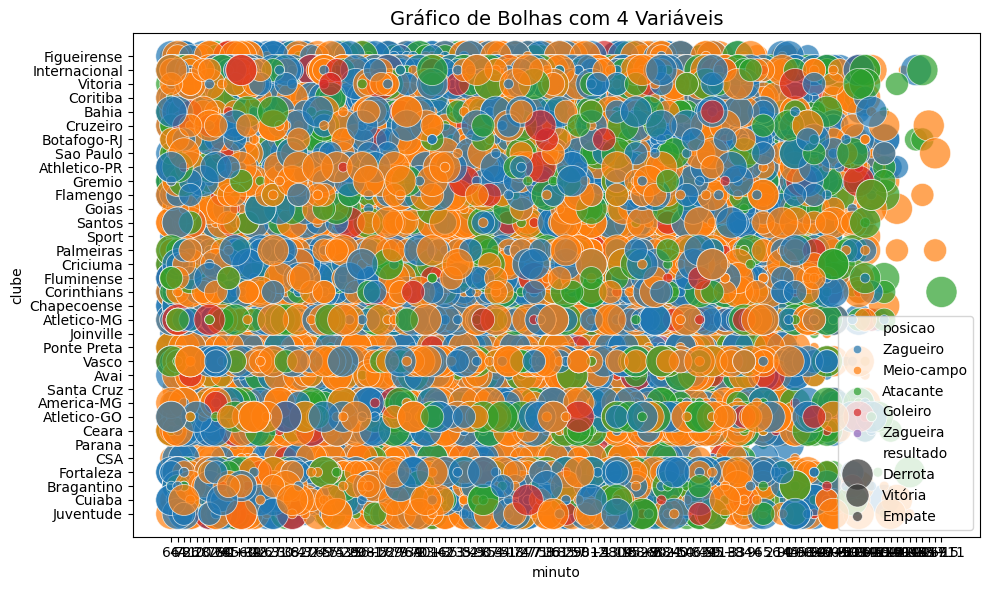

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar 4 variáveis para o gráfico
variavel_x = "minuto"  # Exemplo: variável contínua
variavel_y = "clube"  # Exemplo: variável categórica
variavel_tamanho = "resultado"  # Exemplo: variável categórica
variavel_cor = "posicao"  # Exemplo: variável categórica

# Criar um gráfico de bolhas
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=faltas,
    x=variavel_x,
    y=variavel_y,
    size=variavel_tamanho,
    hue=variavel_cor,
    alpha=0.7,
    sizes=(50, 500),
)
plt.title("Gráfico de Bolhas com 4 Variáveis", fontsize=14)
plt.tight_layout()
plt.show()

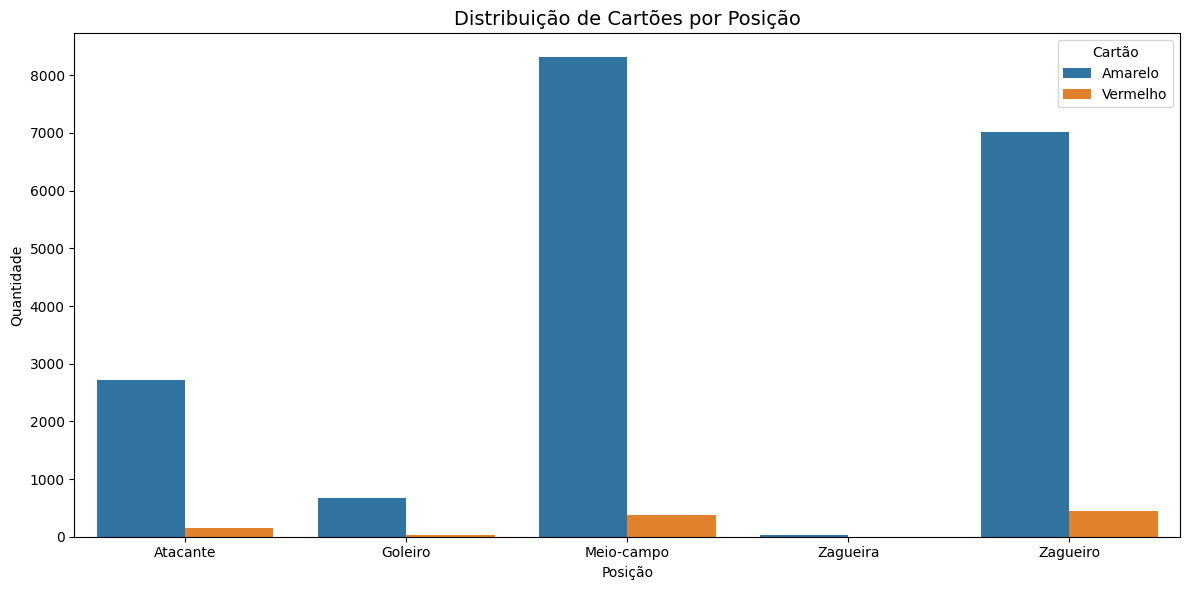

In [45]:
# Gráfico de barras empilhadas para analisar a distribuição de cartões por posição
plt.figure(figsize=(12, 6))
faltas_grouped = faltas.groupby(['posicao', 'cartao']).size().reset_index(name='count')
sns.barplot(
    data=faltas_grouped,
    x='posicao',
    y='count',
    hue='cartao'
)
plt.title("Distribuição de Cartões por Posição", fontsize=14)
plt.xlabel("Posição")
plt.ylabel("Quantidade")
plt.legend(title="Cartão")
plt.tight_layout()
plt.show()

In [48]:
faltas_grouped.minuto.value_counts()

minuto
0       1
1       1
2       1
3       1
4       1
       ..
9014    1
9015    1
9016    1
9017    1
9018    1
Name: count, Length: 122, dtype: int64

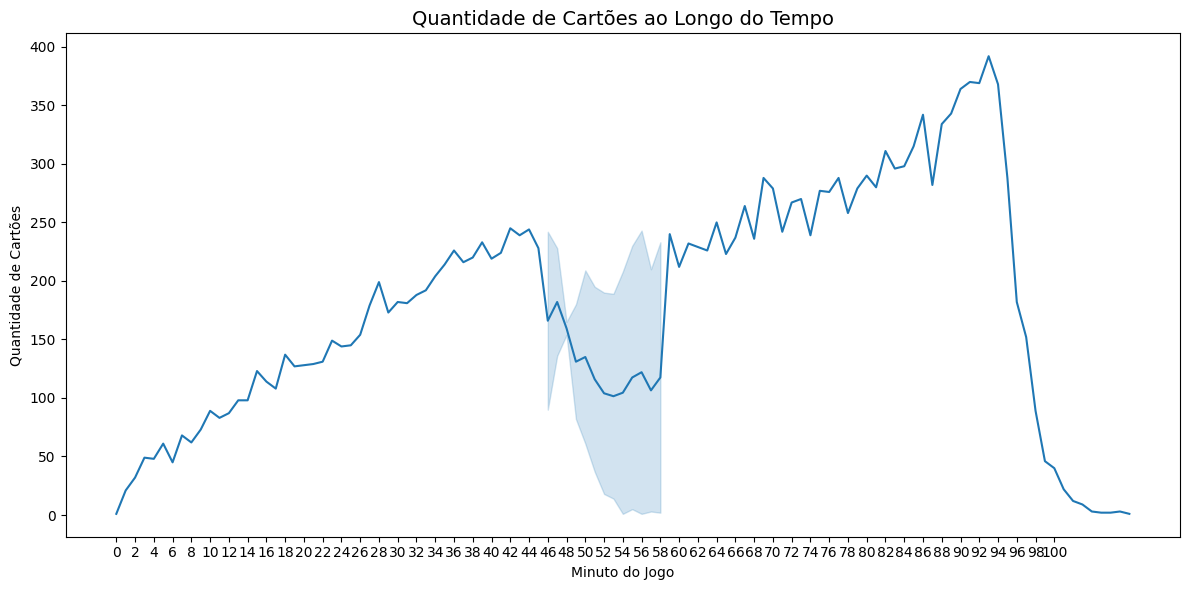

In [50]:
# Gráfico de linha para analisar a quantidade de cartões ao longo do tempo (minuto do jogo)
plt.figure(figsize=(12, 6))
faltas_grouped = faltas.groupby('minuto').size().reset_index(name='count')

# Função para agrupar minutos especiais
def somar_minuto(m_str):
    m_num = m_str.split('+')
    m_num = int(m_num[0])+int(m_num[1]) if len(m_num) > 1 else int(m_num[0])
    return m_num

faltas_grouped['minuto'] = faltas_grouped['minuto'].apply(somar_minuto)

# Sort minutos
faltas_grouped = faltas_grouped.sort_values(by='minuto')

sns.lineplot(
    data=faltas_grouped,
    x='minuto',
    y='count',
    #hue='clube'
)
plt.title("Quantidade de Cartões ao Longo do Tempo", fontsize=14)
plt.xlabel("Minuto do Jogo")
plt.ylabel("Quantidade de Cartões")
plt.xticks(range(0, 101, 2))
plt.tight_layout()
plt.show()

In [23]:
cartoes = pd.read_csv("../../data/processed/analise_cartoes.csv")
cartoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   posicao             2244 non-null   object
 1   tempo_jogo          2244 non-null   object
 2   clube               2244 non-null   object
 3   Quantidade_Cartoes  2244 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 70.3+ KB


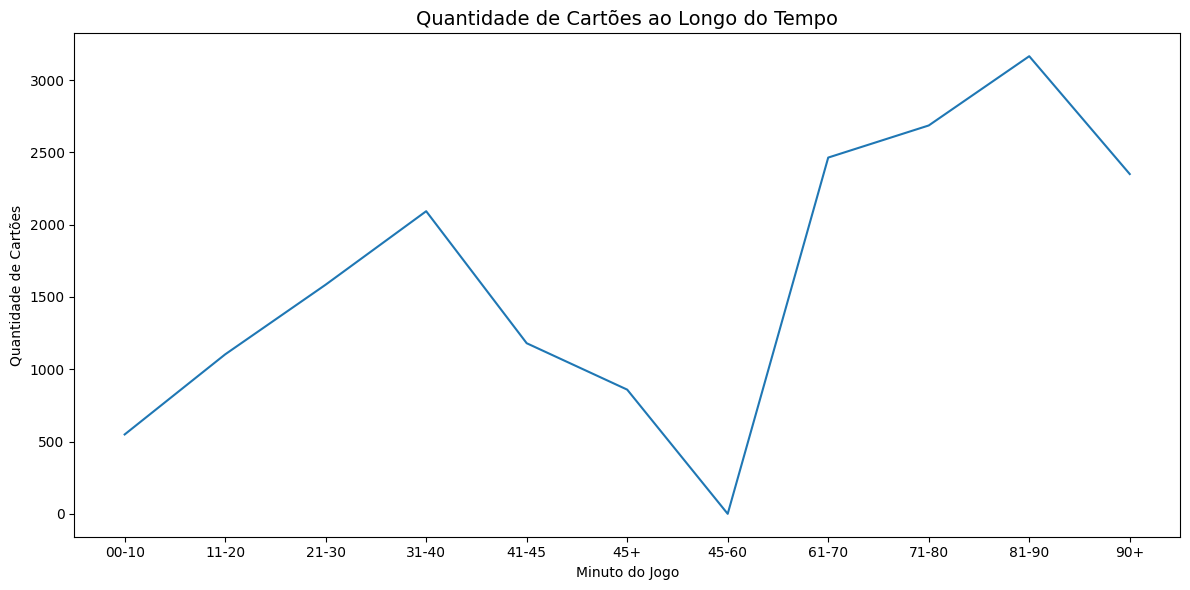

In [52]:
# Gráfico de linha para analisar a quantidade de cartões ao longo do tempo (minuto do jogo)

cartoes_grouped = cartoes.groupby('tempo_jogo')["Quantidade_Cartoes"].sum().reset_index(name='Quantidade_Cartoes')

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=cartoes_grouped,
    x='tempo_jogo',
    y='Quantidade_Cartoes',
    #hue='clube'
)
plt.title("Quantidade de Cartões ao Longo do Tempo", fontsize=14)
plt.xlabel("Minuto do Jogo")
plt.ylabel("Quantidade de Cartões")
#plt.xticks(range(0, 101, 5))
plt.tight_layout()
plt.show()

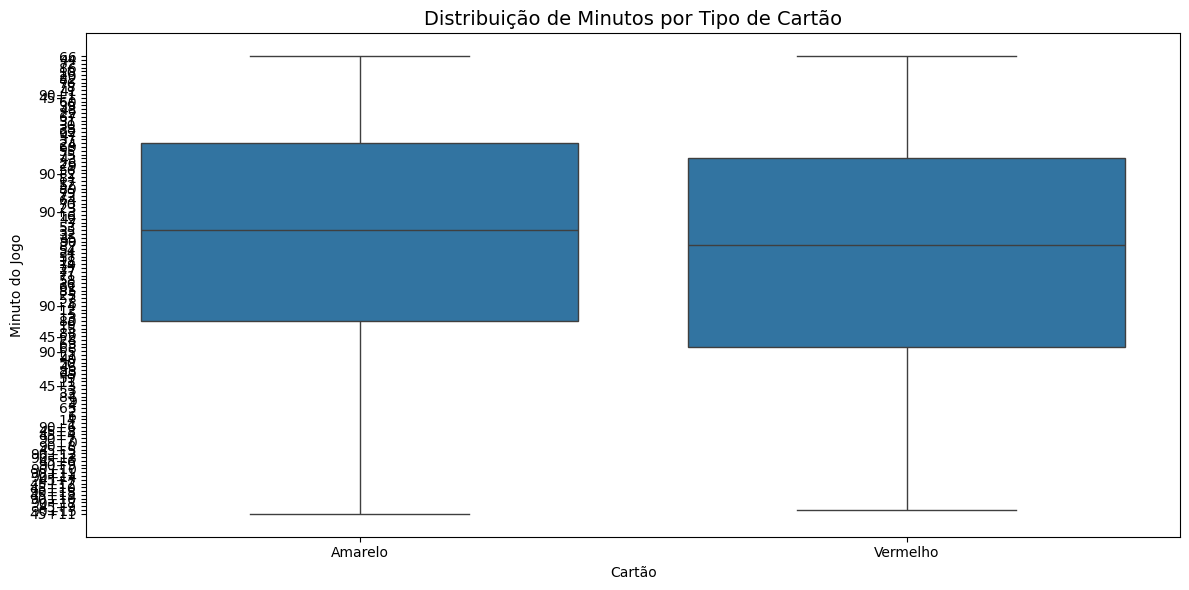

In [9]:
# Gráfico de caixa para analisar a distribuição de minutos por tipo de cartão
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=faltas,
    x='cartao',
    y='minuto'
)
plt.title("Distribuição de Minutos por Tipo de Cartão", fontsize=14)
plt.xlabel("Cartão")
plt.ylabel("Minuto do Jogo")
plt.tight_layout()
plt.show()